Exercise 2

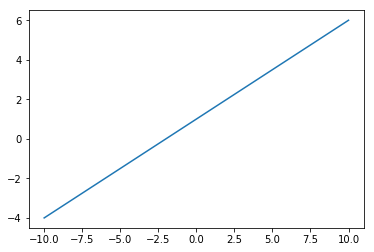

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

#-A- +.pdf file
x = np.array(range(-10,11))
plt.plot(x, 0.5 * x + 1)

In [2]:
#-B-
#Joint Normal Distributions means and covariance matrix
mean = (2, 2)
cov = [[4, 2], [2, 3]]
#We generate 100 datasets with random values from the joint pdf
D = []
for i in range(0,100):
    D.append(np.random.multivariate_normal(mean, cov, 50).T)

In [3]:
#-C-
#For every dataset we generated above, we calculate the thetas by applying the least squares criterion
theta0_list = []
theta1_list = []
for i in D:
    x = i[0]
    y = i[1]
    #Apply the least squares criterion for fitting a line to the training samples
    X = np.stack((np.ones((50)),x), axis = -1)
    
    Xinv = np.linalg.inv(np.dot(X.T,X))
    theta0, theta1 = Xinv.dot(X.T).dot(y)
    
    theta0_list.append(theta0)
    theta1_list.append(theta1) 

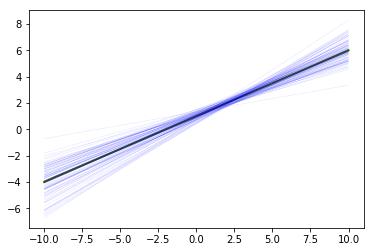

In [4]:
#-D-
#We plot with green color the theta optimal.(Exercise2_QuestionA)
x = np.array(range(-10, 11))
plt.plot(x, 0.5 * x + 1, color='green', linewidth=2)

#We plot with red color the theta mean 
theta0_mean = np.mean(theta0_list)
theta1_mean = np.mean(theta1_list)


plt.plot(x, theta1_mean * x + theta0_mean, color='red', linewidth=0.5)

#We plot with blue color all the thetas from different datasets.
for i in range(0,100):
       plt.plot(x, theta1_list[i] * x + theta0_list[i], color='blue', linewidth=0.05)


plt.show() 
#We observe that the thetas_mean approaches very well the optimal thetas.

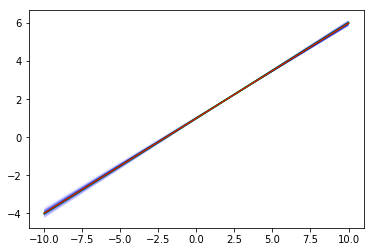

In [5]:
#-E-
#We repeat the process above for datasets of 5000 points.
mean = (2, 2)
cov = [[4, 2], [2, 3]]
D = []
for i in range(0,100):
    D.append(np.random.multivariate_normal(mean, cov, 5000).T)

theta0_list = []
theta1_list = []
for i in D:
    x = i[0]
    y = i[1]   
    X = np.stack((np.ones((5000)),x), axis = -1)
    Xinv = np.linalg.inv(np.dot(X.T,X),)
    theta0, theta1 = Xinv.dot(X.T).dot(y)
    theta0_list.append(theta0)
    theta1_list.append(theta1)    

x = np.array(range(-10, 11))
for i in range(0,100):
       plt.plot(x, theta1_list[i] * x + theta0_list[i], color='blue', linewidth=0.05)
plt.plot(x, 0.5 * x + 1, color='green', linewidth = 2)
theta0_mean = np.mean(theta0_list)
theta1_mean = np.mean(theta1_list)
plt.plot(x, theta1_mean * x + theta0_mean, color='red', linewidth = 1)
plt.show()

In conclusion, we observe that even when we have small samples of 50 points we can effectively approach the optimal g(x) through the mean theta technique. Nevertheless, a bigger sample can help us draw conclusions which are more reliable. In the case that we had samples of 5000 points all the thetas were close to the theta optimal.

Exercise 3

In [6]:
#-A-
x, y = np.random.multivariate_normal(mean, cov, 100).T

In [7]:
#-B-
#calculate g(x)
X = np.stack((np.ones((100)),x), axis = -1)
Xinv = np.linalg.inv(np.dot(X.T,X),)
theta0, theta1 = Xinv.dot(X.T).dot(y)

In [8]:
#Generate 50 x points and calculate the values of the predicted and true ys.
x = np.random.randint(low = -100, high = 100, size = 50)
y_hat = x * theta1 + theta0
y_opt = x * 0.5 + 1

In order to quantify the performance of f(xn;D’) in terms of that of E[y|x].
We calculate MeanSquareError and Coefficient of Determination(R-squared).

In [9]:
#Sum squared error
SSE = ((y_opt-y_hat)**2).sum()
#Mean squared error
MSE = np.mean((y_opt-y_hat)**2)

def squared_error(ys_orig,ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))

def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [np.mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)



print('Mean Squared Error: ', MSE)
print('R-squared: ', coefficient_of_determination(y_opt,y_hat))

Mean Squared Error:  3.19182616404
R-squared:  0.996019913284
